In [1]:
%load_ext autoreload
%autoreload 2

In [32]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import anaclass

### first lets play with the toy data (only 10 realizations)

In [60]:
example = anaclass.Realizations("../../data/1000_8_0/", 1e8)

In [65]:
#example.grab_mass("acc", Nhalo=20000)

example.grab_mass("acc_surv", Nhalo=32000)

#example.grab_mass("surv", Nhalo=20000)

number of realizations: 822
number of branches/subhalos: 32000
saving to numpy files to the same directory


In [73]:
import os
files = []    
for filename in os.listdir("../../data/1000_8_0/"):
    if filename.startswith('tree') and filename.endswith('evo.npz'): 
        files.append(os.path.join("../../data/1000_8_0/", filename))

In [74]:
lenlist=[]
for i in files:
    tree = np.load(i)
    mask = tree["mass"] != -99
    print(tree["mass"][mask])


[3.35844902e+12 3.35720830e+12 3.35574581e+12 ... 4.15839006e+06
 4.15839006e+06 3.72437484e+06]
[2.54529638e+12 2.54187340e+12 2.54098413e+12 ... 4.23376909e+06
 4.23376909e+06 3.79093093e+06]
[7.36676235e+12 7.36303656e+12 7.35957444e+12 ... 4.27090041e+06
 4.27090041e+06 3.82644194e+06]
[9.72026399e+12 9.71322590e+12 9.70627498e+12 ... 4.53043047e+06
 4.05478219e+06 3.62886361e+06]
[3.06200757e+12 3.06098707e+12 3.05961742e+12 ... 4.02604239e+06
 3.60507650e+06 3.60507650e+06]
[1.84191574e+12 1.57004175e+12 1.56702139e+12 ... 4.11498518e+06
 3.68557723e+06 3.68557723e+06]
[4.04024461e+12 4.03844505e+12 4.03530694e+12 ... 4.98508992e+06
 4.46154817e+06 3.99276282e+06]
[9.28134380e+12 9.26988418e+12 9.26579159e+12 ... 4.26900583e+06
 3.82090482e+06 3.82090482e+06]
[2.92374209e+12 2.92264711e+12 2.92078366e+12 ... 4.42756397e+06
 3.96768186e+06 3.96768186e+06]
[1.60350035e+12 1.60234759e+12 1.60178957e+12 ... 4.31044341e+06
 3.86155908e+06 3.86155908e+06]
[2.92374209e+12 2.92249198e+12

In [64]:
max(lenlist)

31591

In [49]:
path = "../../data/1000_8_0/tree_12.291_778.npz_evo.npz"


def surviving_mass(file, mlres):

    tree = np.load(file)
    mass = tree["mass"]
    mass = np.delete(mass, 1, axis=0) #there is some weird bug for this index
    mask = mass != -99. # converting to NaN values
    mass = np.where(mask, mass, np.nan)  
    min_mass = mass[:,0] # the final index is the redshift we evolve it to. this will be the minimum!
    ana_mass = min_mass[min_mass > mlres] #is it above the mass resolution?
    ana_redshift = np.zeros(ana_mass.shape)
    
    return ana_mass, ana_redshift

In [51]:
Mh, z = surviving_mass(path, 1e8)

In [46]:
def plot_single_realization(tree, nhalo=20, rand=True, i=10):

    mass = tree["mass"]
    time = tree["CosmicTime"]

    if rand==True:
        select = np.random.randint(1,mass.shape[0],nhalo)
    elif rand==False:
        select = np.linspace(i,i+nhalo, nhalo).astype("int")

    colors = cm.viridis(np.linspace(0, 1, nhalo))

    plt.figure(figsize=(6,6))

    for i in range(nhalo):
        plt.plot(time, mass[select[i]], color=colors[i])

    plt.plot(time, mass[0], color="red")
    plt.xlabel("Gyr", fontsize=15)
    plt.ylabel("halo mass (M$_{\odot}$)", fontsize=15)
    plt.yscale("log")
    plt.axhline(10**8, ls="--", color="black")
    plt.ylim(1e6,1e14)
    plt.show()

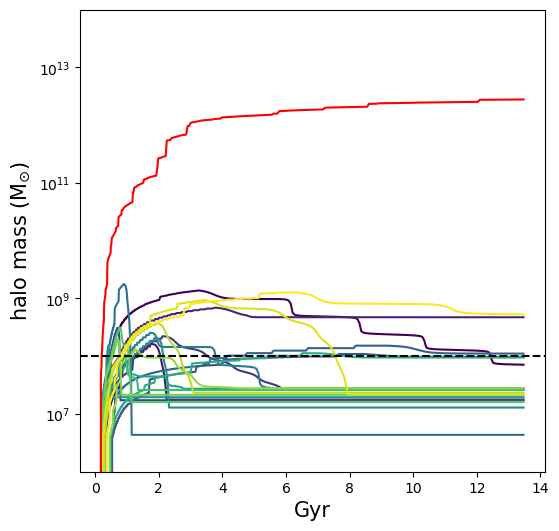

In [47]:
plot_single_realization(tree)

In [56]:
def CSMF_1D(Ms, Npix=50, plot=True):

    """
    calculates the cumulative satellite mass function given a number of mass ind
    input mass should not be in log space
    """
    # the same x-array for all the CSMFs
    mass_range = np.logspace(8,13,Npix)
    I = [np.sum(Ms > np.log10(i)) for i in mass_range]
                    
    if plot==True:
        
        plt.figure(figsize=(8, 8))

        plt.plot(mass_range, I, color="black")
        plt.grid(alpha=0.4)
        plt.yscale("log")
        plt.xscale("log")
        plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
        plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
        plt.show()

    return I

In [58]:
np.log10(Mh)

array([12.44587176,  8.09714183,  9.31317304,  8.64879765,  8.77480642,
        8.35627541,  8.17185966,  8.69163257,  8.5985642 ,  8.00557216,
        9.41379712,  9.01937758,  8.06392522,  8.40962859,  9.35052964,
        8.49828108,  8.04983112,  8.2097346 ,  8.00938623,  8.55813101,
        8.24931958,  8.00891611,  8.92576647,  8.38447252,  8.24379874,
        8.86122956,  8.11352586,  8.50974223,  8.56512362, 10.92551355,
       10.83698857,  8.7211149 ,  8.60206126,  8.05253573,  8.04587071,
        8.32922721,  9.25622005,  8.05330489,  8.42048308,  9.40757646,
        8.2244121 ,  9.5885155 ,  8.27227705,  8.51419332,  8.43769145,
        8.0869268 ,  8.76641718,  8.37070396,  8.03380399,  8.01769033,
        8.02391248,  8.09921872,  8.22368667,  8.10829065,  8.20648061,
        8.15360776,  8.86898954,  8.09970673,  8.63229825,  8.30286549,
        9.46552667,  8.98603366,  8.57687601,  8.63441693,  8.29080061,
        8.00112107,  8.43554693,  8.2348542 ,  8.15320875,  9.17

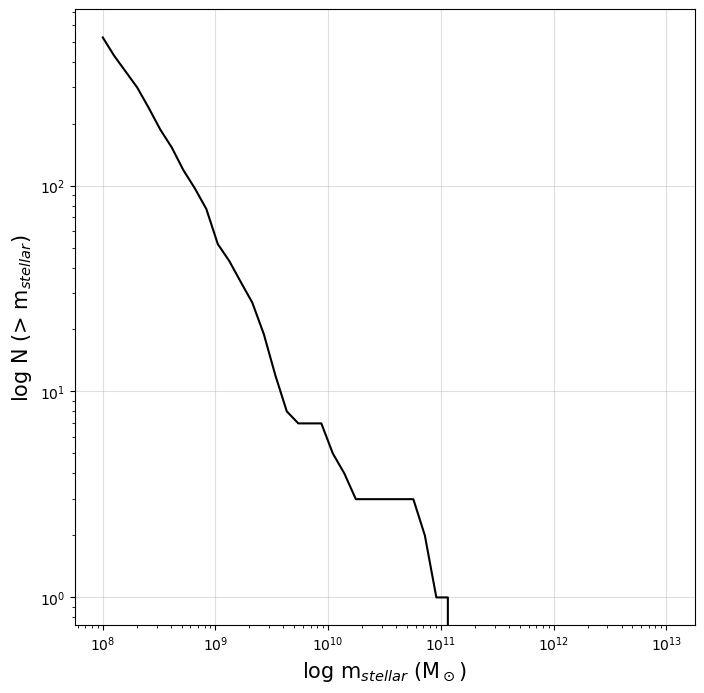

[524,
 426,
 357,
 299,
 238,
 187,
 153,
 119,
 97,
 77,
 52,
 43,
 34,
 27,
 19,
 12,
 8,
 7,
 7,
 7,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [59]:
CSMF_1D(np.log10(Mh[1:-1]))

In [66]:
massmat = anaclass.MassMat("../../data/1000_8_0/acc_surv_mass.npy")

massmat.prep_data()

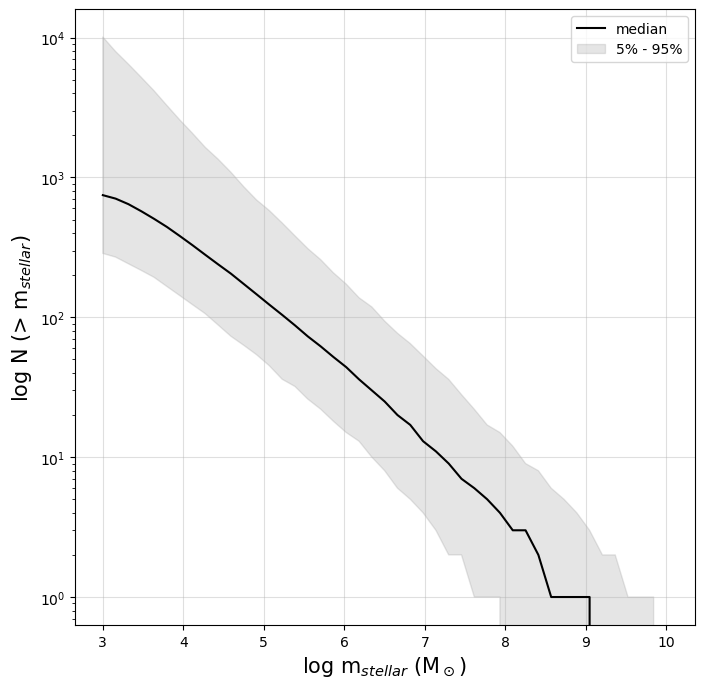

In [67]:
massmat.CSMF()

massmat.plot_CSMF()

### now running the data from 3000 realizations

In [9]:
# file = "../../data/12_4_0/surv_mass.npy"
# temp = np.load(file)
# zero_mask = temp != 0.0 
# Mh = np.where(zero_mask, temp, np.nan) #switching the to nans!

# np.save(file, Mh) just a little switch!

In [10]:
massmat = anaclass.MassMat("../../data/12_4_0/acc_surv_mass.npy")

massmat.prep_data()

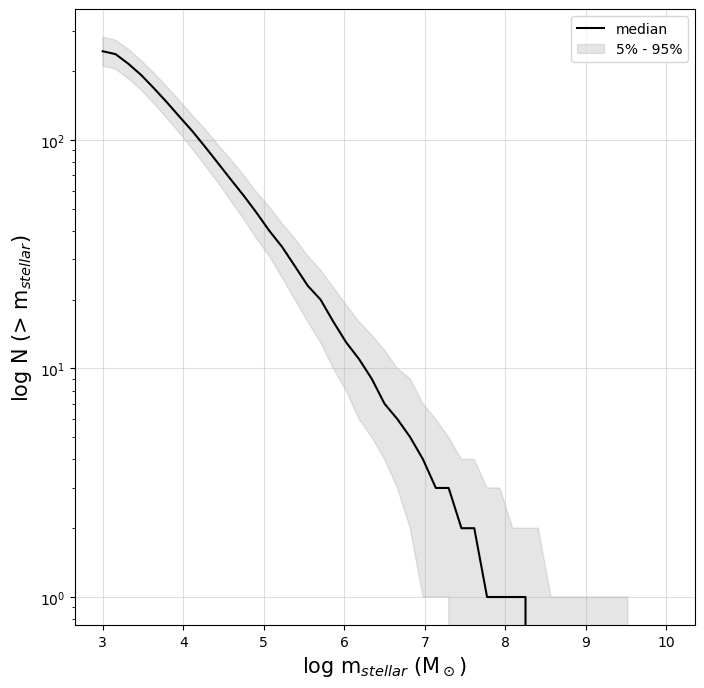

In [15]:
massmat.CSMF()

massmat.plot_CSMF()

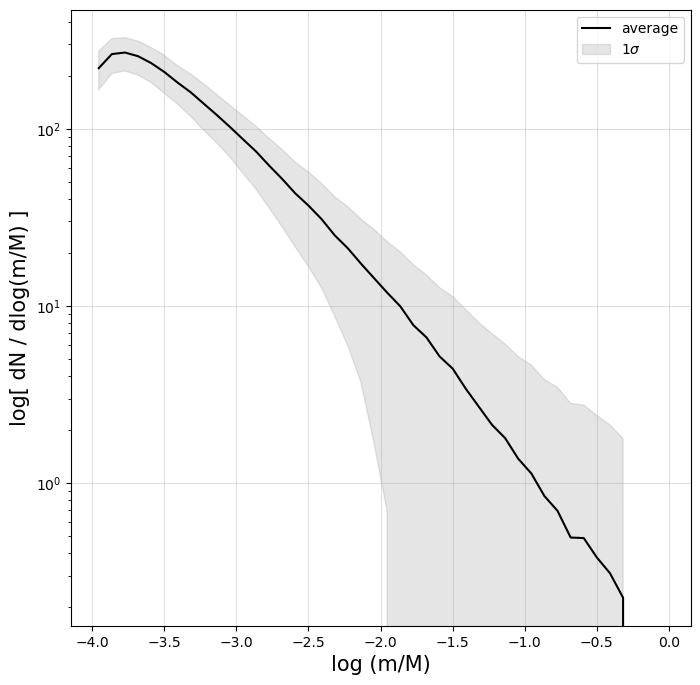

In [16]:
massmat.SHMF()

massmat.plot_SHMF()